In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import OneHotEncoder
import ast
import json
import shap
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Data Preprocessing/preprocessed_data.csv")

In [3]:
new_data = pd.read_csv("Data Preprocessing/simplified.csv")

Get unique Genres

In [4]:
genres = data['genres'].apply(ast.literal_eval)
unique_genres = set(genre['name'] for genres_list in genres for genre in genres_list)
print(unique_genres)

{'History', 'Crime', 'Adventure', 'Horror', 'Music', 'Science Fiction', 'Comedy', 'Mystery', 'Family', 'Fantasy', 'War', 'Romance', 'Thriller', 'Drama', 'Western', 'Action'}


Create two versions of the dataframe

In [5]:
talent_data = new_data.drop(columns=['budget'])
finance_data = new_data.drop(columns=['total_talent'])

talent and finance features:

In [6]:
talent_f = ['total_talent']
finance_f = ['budget']

Linear regression model

In [7]:
def apply_linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return model, mse, X_test

Random Forest Classifier

In [8]:
def apply_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return model, mse

ELI5 for data analysis and visualisation

In [9]:
def visualize_with_eli5(model, feature_names, X_test):
    # Ensure feature names match those seen at fit time
    y_pred = model.predict(X_test)

    # Fit permutation importance with feature names
    perm = PermutationImportance(model).fit(X_test, y_pred, feature_names=feature_names)

    # Show weights with feature names
    eli5.explain_weights(perm, feature_names=list(feature_names))

SHAP for data visualisation

In [10]:
def shap_values(model, X_test):
    # Create a callable function that takes a DataFrame as input
    explainer = shap.Explainer(model, X_test)
    shap_values = explainer.shap_values(X_test)
    return shap_values

In [11]:
def plot_shap_summary(model_name, genre, outcome, shap_values, X_test, features):
    plt.figure(figsize=(12, 6))
    plt.title(f'SHAP Summary Plot - {model_name} - Genre: {genre} - Outcome: {outcome}')
    shap.summary_plot(shap_values, X_test, feature_names=features, show=False)
    plt.tight_layout()
    plt.savefig(f"{model_name}_{genre}_{outcome}_shap_summary.png")
    plt.show()

Fxn to prepare the data for RFC and LR and to group by Genre

In [16]:
def apply_models_for_outcomes(data, new_data, d, unique_genres, features):
    
    outcomes = ['revenue', 'Rating_IMDB_actor']
    for genre in unique_genres:
        g_df = pd.DataFrame()
        for index, row in d.iterrows():
            if row['Film_film'] in data['Film_film'].values:
                m_genre_str = data[data['Film_film'] == row['Film_film']]['genres'].iloc[0]
                m_genre = ast.literal_eval(m_genre_str)
            if any(item['name'] == genre for item in m_genre):
                g_df = pd.concat([g_df, row.to_frame().T], ignore_index=True)
        
        for outcome in outcomes:
            X = d[features]
            y = d[outcome]

            # Apply Linear Regression
            print(f"\nLinear Regression for {outcome} in Genre {genre}:")
            linear_reg_model, linear_reg_mse, X_test = apply_linear_regression(X, y)
            print(f'Mean Squared Error (Linear Regression): {linear_reg_mse}')

            shap_values_linear = shap_values(linear_reg_model, X_test)
            plot_shap_summary('LinearRegression', genre, outcome, shap_values_linear, X_test, features)

            # Apply Random Forest Regression
            print(f"\nRandom Forest Regression for {outcome} in Genre {genre}:")
            rf_model, rf_mse = apply_random_forest(X, y)
            print(f'Mean Squared Error (Random Forest Regression): {rf_mse}')

            shap_values_rf = shap_values(rf_model, X_test)
            plot_shap_summary('RandomForest', genre, outcome, shap_values_rf, X_test, features)
#             # Visualize feature importance using eli5
#             visualize_with_eli5(rf_model, features, X)

Test talent data 


Linear Regression for revenue in Genre History:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


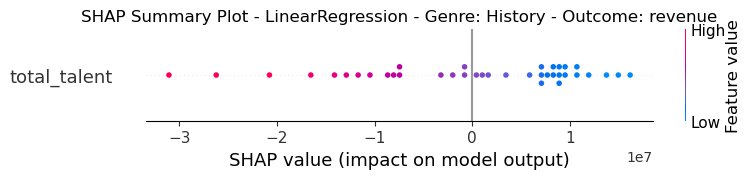


Random Forest Regression for revenue in Genre History:
Mean Squared Error (Random Forest Regression): 9.835800888449826e+16


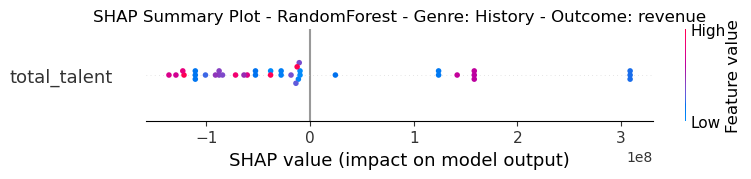


Linear Regression for Rating_IMDB_actor in Genre History:
Mean Squared Error (Linear Regression): 0.21556149703024796


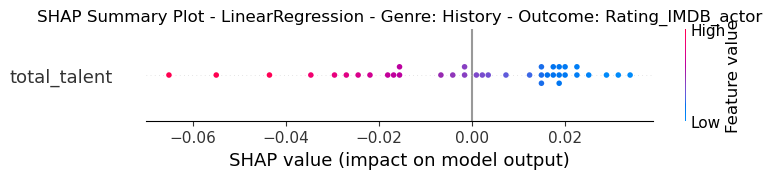


Random Forest Regression for Rating_IMDB_actor in Genre History:
Mean Squared Error (Random Forest Regression): 0.2492825024528959


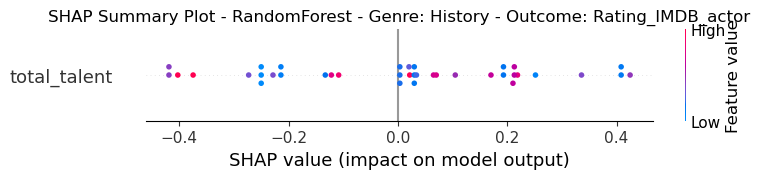


Linear Regression for revenue in Genre Crime:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


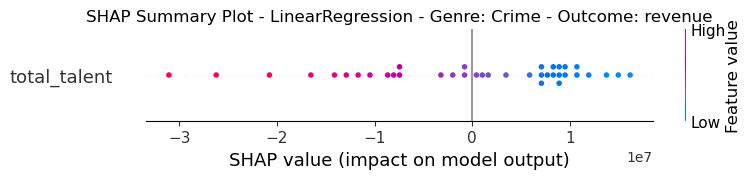


Random Forest Regression for revenue in Genre Crime:
Mean Squared Error (Random Forest Regression): 9.425601794264645e+16


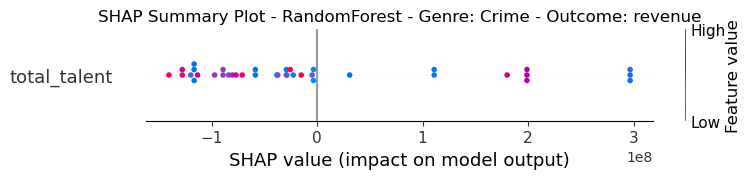


Linear Regression for Rating_IMDB_actor in Genre Crime:
Mean Squared Error (Linear Regression): 0.21556149703024796


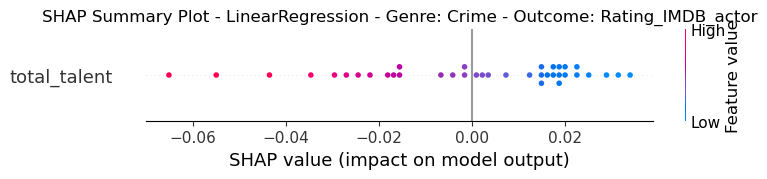


Random Forest Regression for Rating_IMDB_actor in Genre Crime:
Mean Squared Error (Random Forest Regression): 0.2506156145147061


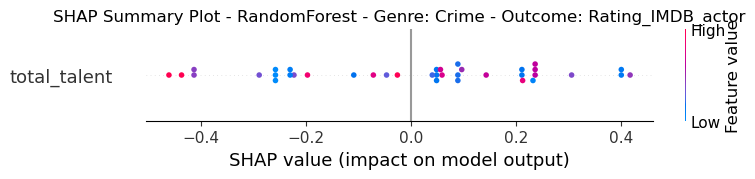


Linear Regression for revenue in Genre Adventure:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


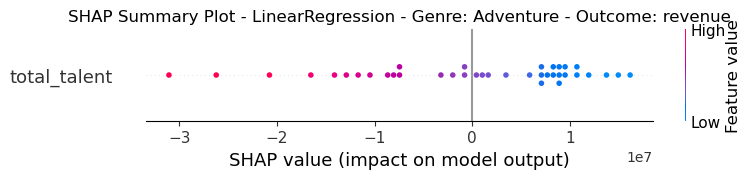


Random Forest Regression for revenue in Genre Adventure:
Mean Squared Error (Random Forest Regression): 9.446130960703813e+16


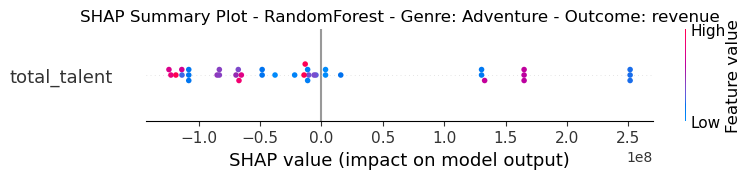


Linear Regression for Rating_IMDB_actor in Genre Adventure:
Mean Squared Error (Linear Regression): 0.21556149703024796


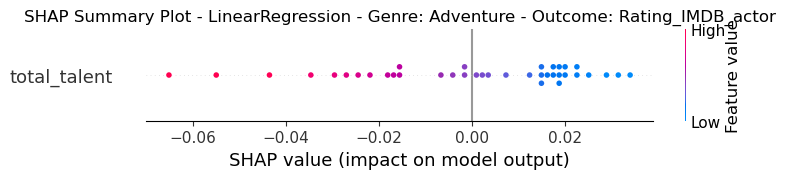


Random Forest Regression for Rating_IMDB_actor in Genre Adventure:
Mean Squared Error (Random Forest Regression): 0.24811306072062433


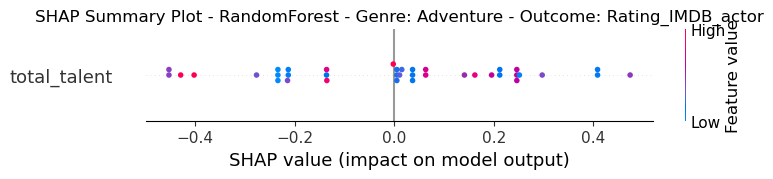


Linear Regression for revenue in Genre Horror:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


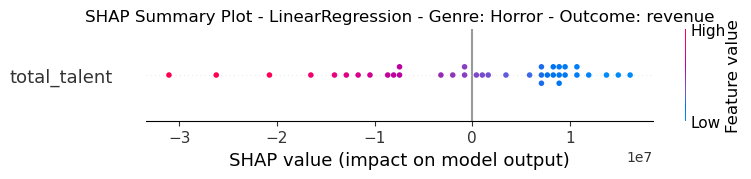


Random Forest Regression for revenue in Genre Horror:
Mean Squared Error (Random Forest Regression): 9.48189614691637e+16


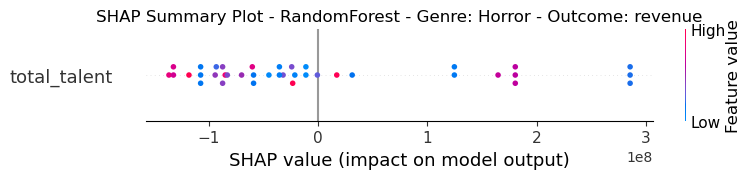


Linear Regression for Rating_IMDB_actor in Genre Horror:
Mean Squared Error (Linear Regression): 0.21556149703024796


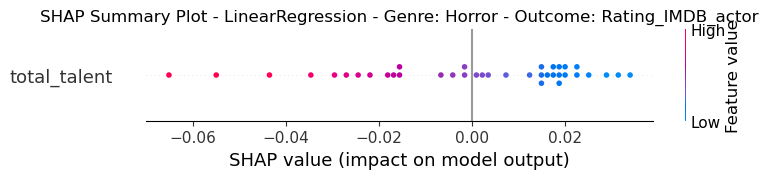


Random Forest Regression for Rating_IMDB_actor in Genre Horror:
Mean Squared Error (Random Forest Regression): 0.2558036077096773


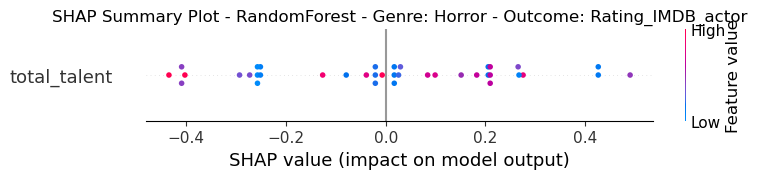


Linear Regression for revenue in Genre Music:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


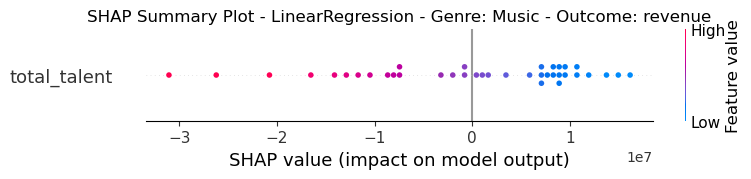


Random Forest Regression for revenue in Genre Music:
Mean Squared Error (Random Forest Regression): 9.12472864763232e+16


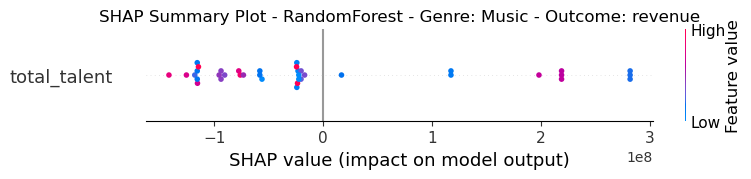


Linear Regression for Rating_IMDB_actor in Genre Music:
Mean Squared Error (Linear Regression): 0.21556149703024796


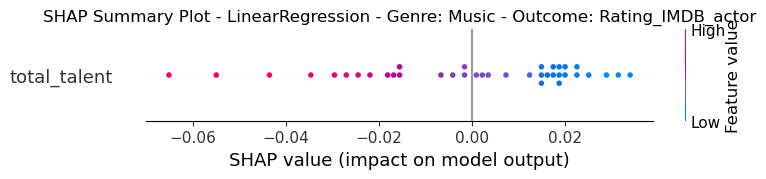


Random Forest Regression for Rating_IMDB_actor in Genre Music:
Mean Squared Error (Random Forest Regression): 0.252645239768089


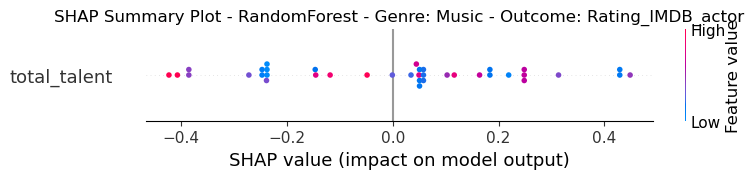


Linear Regression for revenue in Genre Science Fiction:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


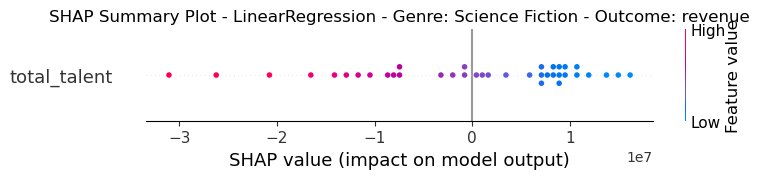


Random Forest Regression for revenue in Genre Science Fiction:
Mean Squared Error (Random Forest Regression): 9.50263858501357e+16


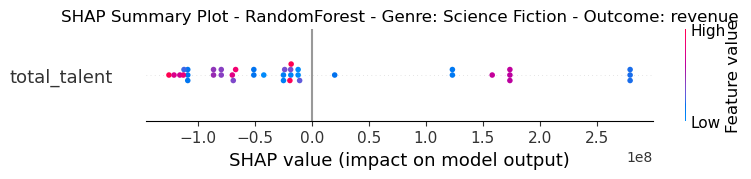


Linear Regression for Rating_IMDB_actor in Genre Science Fiction:
Mean Squared Error (Linear Regression): 0.21556149703024796


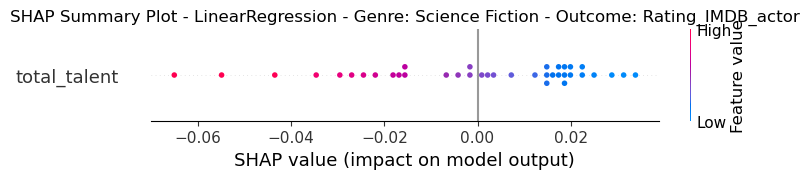


Random Forest Regression for Rating_IMDB_actor in Genre Science Fiction:
Mean Squared Error (Random Forest Regression): 0.2556392861378811


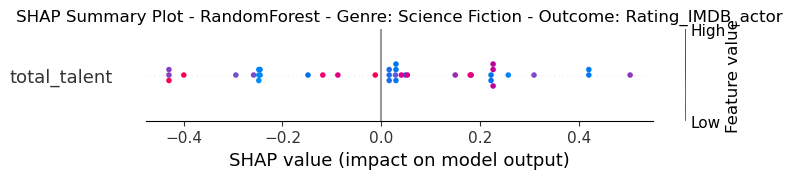


Linear Regression for revenue in Genre Comedy:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


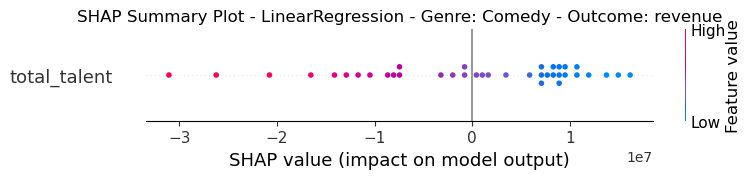


Random Forest Regression for revenue in Genre Comedy:
Mean Squared Error (Random Forest Regression): 9.667616836718438e+16


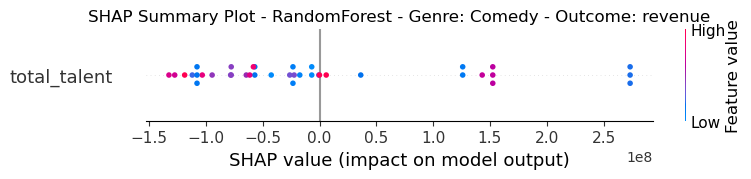


Linear Regression for Rating_IMDB_actor in Genre Comedy:
Mean Squared Error (Linear Regression): 0.21556149703024796


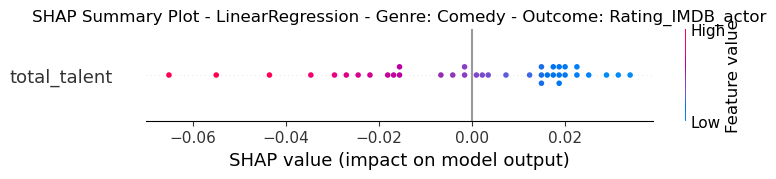


Random Forest Regression for Rating_IMDB_actor in Genre Comedy:
Mean Squared Error (Random Forest Regression): 0.2535904955876966


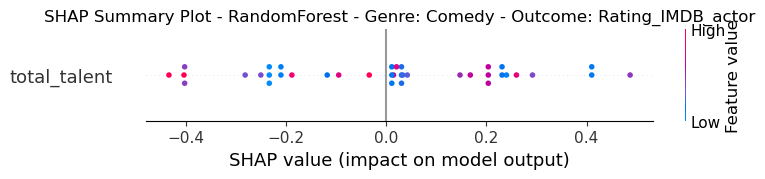


Linear Regression for revenue in Genre Mystery:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


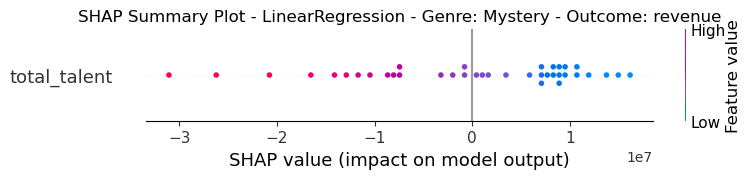


Random Forest Regression for revenue in Genre Mystery:
Mean Squared Error (Random Forest Regression): 9.765552589873376e+16


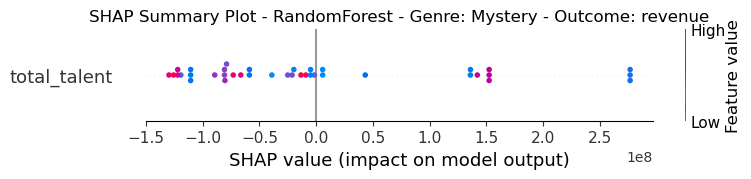


Linear Regression for Rating_IMDB_actor in Genre Mystery:
Mean Squared Error (Linear Regression): 0.21556149703024796


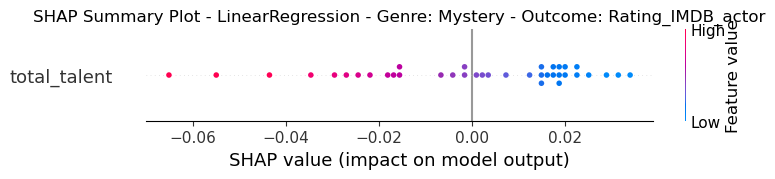


Random Forest Regression for Rating_IMDB_actor in Genre Mystery:
Mean Squared Error (Random Forest Regression): 0.2543193770845809


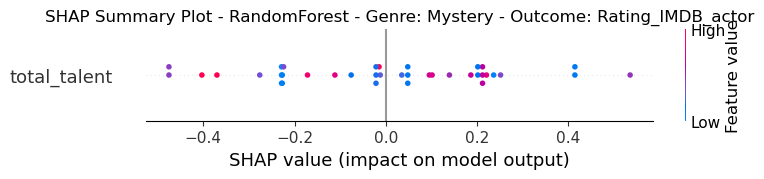


Linear Regression for revenue in Genre Family:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


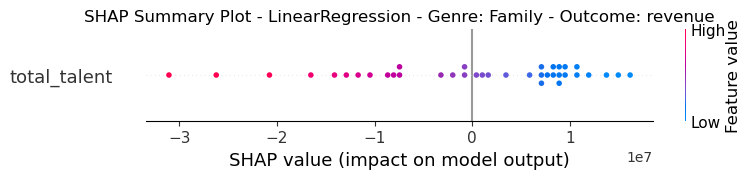


Random Forest Regression for revenue in Genre Family:
Mean Squared Error (Random Forest Regression): 9.525482628709858e+16


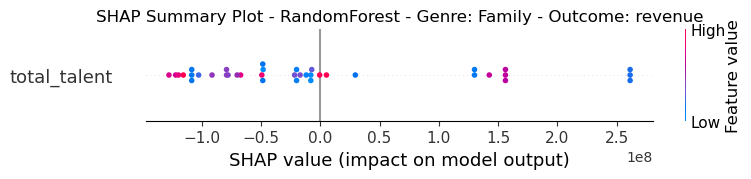


Linear Regression for Rating_IMDB_actor in Genre Family:
Mean Squared Error (Linear Regression): 0.21556149703024796


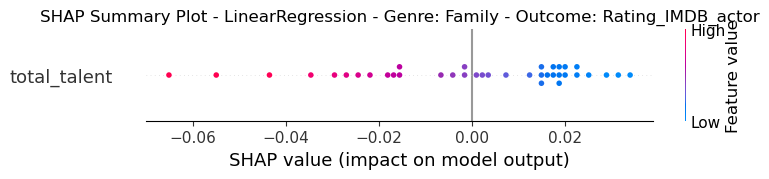


Random Forest Regression for Rating_IMDB_actor in Genre Family:
Mean Squared Error (Random Forest Regression): 0.253283631267903


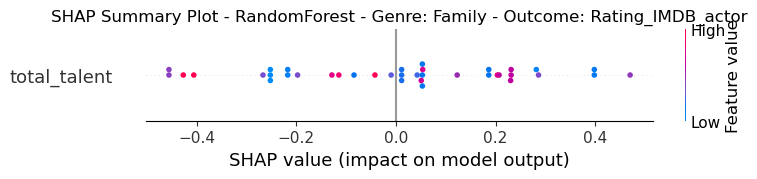


Linear Regression for revenue in Genre Fantasy:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


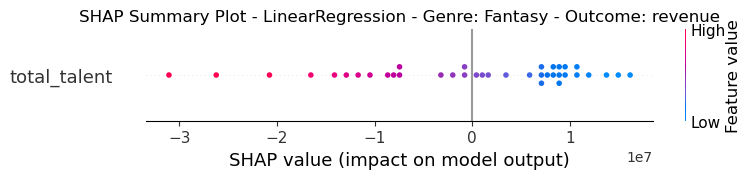


Random Forest Regression for revenue in Genre Fantasy:
Mean Squared Error (Random Forest Regression): 9.698637389571691e+16


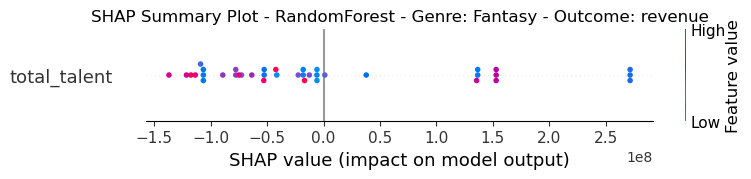


Linear Regression for Rating_IMDB_actor in Genre Fantasy:
Mean Squared Error (Linear Regression): 0.21556149703024796


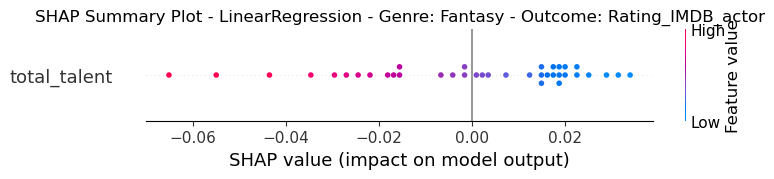


Random Forest Regression for Rating_IMDB_actor in Genre Fantasy:
Mean Squared Error (Random Forest Regression): 0.2513371692047548


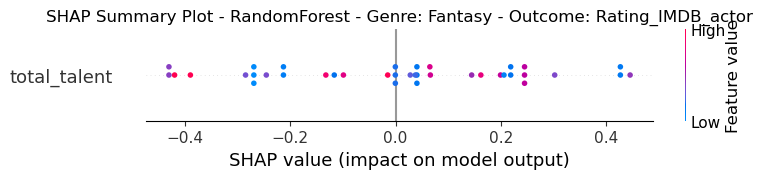


Linear Regression for revenue in Genre War:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


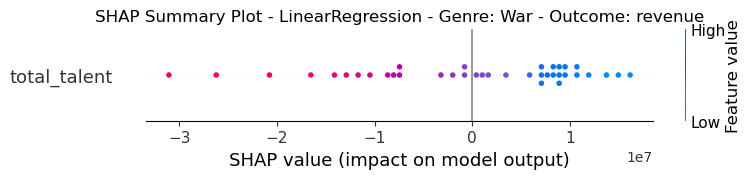


Random Forest Regression for revenue in Genre War:
Mean Squared Error (Random Forest Regression): 9.59290260806997e+16


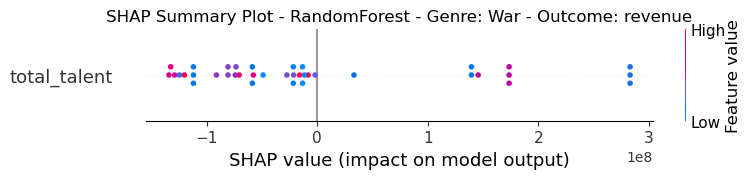


Linear Regression for Rating_IMDB_actor in Genre War:
Mean Squared Error (Linear Regression): 0.21556149703024796


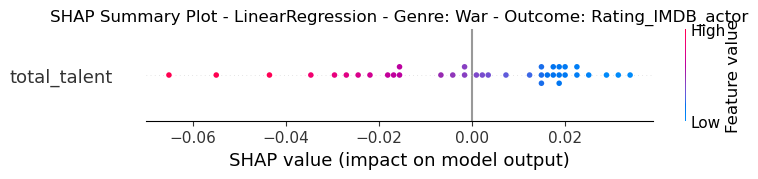


Random Forest Regression for Rating_IMDB_actor in Genre War:
Mean Squared Error (Random Forest Regression): 0.2508966684361161


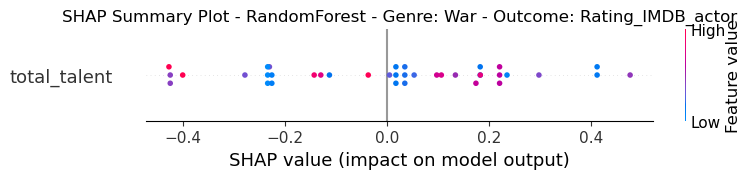


Linear Regression for revenue in Genre Romance:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


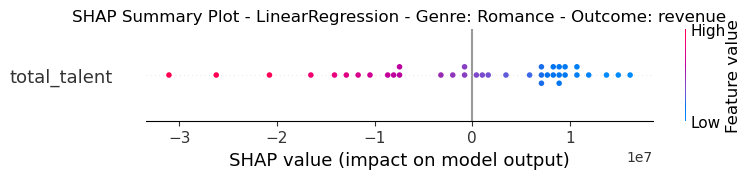


Random Forest Regression for revenue in Genre Romance:
Mean Squared Error (Random Forest Regression): 9.280628756831355e+16


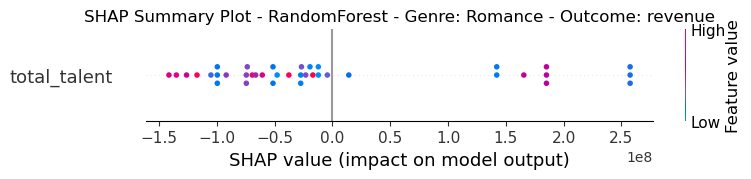


Linear Regression for Rating_IMDB_actor in Genre Romance:
Mean Squared Error (Linear Regression): 0.21556149703024796


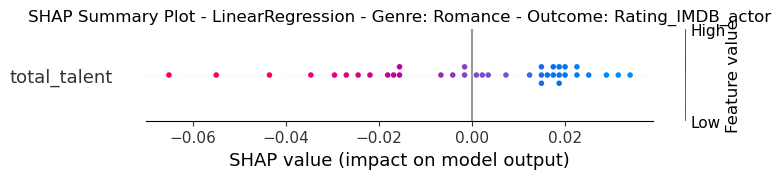


Random Forest Regression for Rating_IMDB_actor in Genre Romance:
Mean Squared Error (Random Forest Regression): 0.24807613960644126


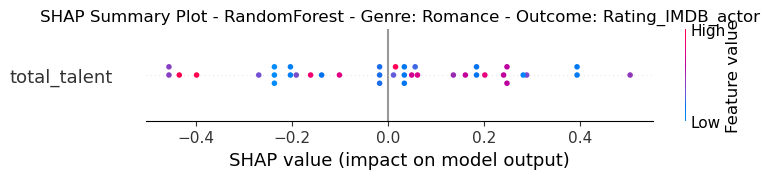


Linear Regression for revenue in Genre Thriller:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


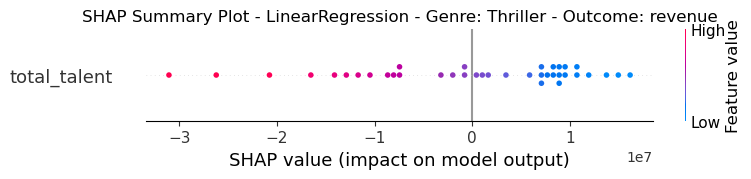


Random Forest Regression for revenue in Genre Thriller:
Mean Squared Error (Random Forest Regression): 9.328100973138389e+16


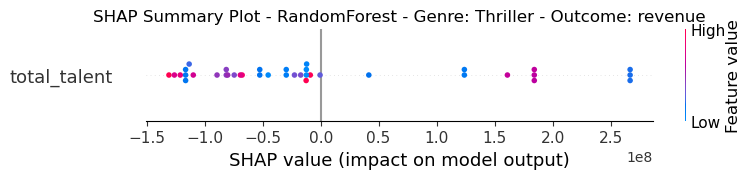


Linear Regression for Rating_IMDB_actor in Genre Thriller:
Mean Squared Error (Linear Regression): 0.21556149703024796


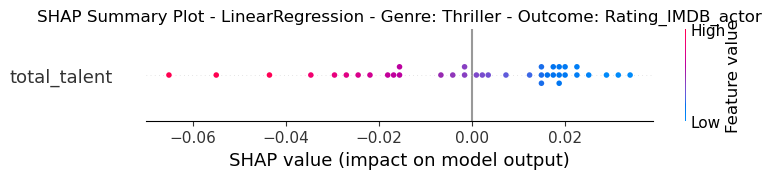


Random Forest Regression for Rating_IMDB_actor in Genre Thriller:
Mean Squared Error (Random Forest Regression): 0.24847986030890845


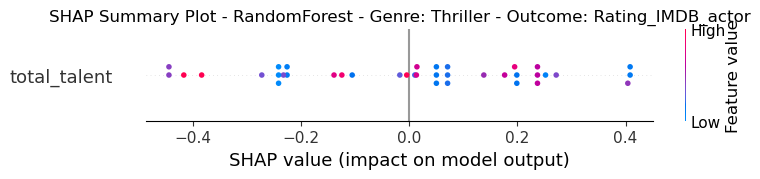


Linear Regression for revenue in Genre Drama:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


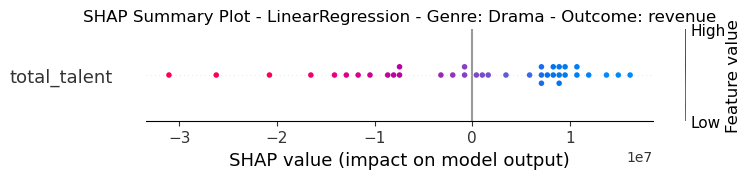


Random Forest Regression for revenue in Genre Drama:
Mean Squared Error (Random Forest Regression): 9.238901246870293e+16


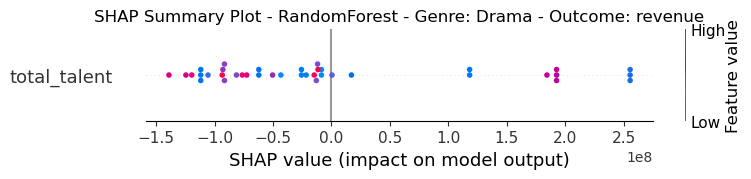


Linear Regression for Rating_IMDB_actor in Genre Drama:
Mean Squared Error (Linear Regression): 0.21556149703024796


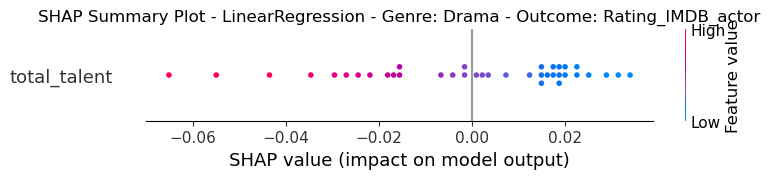


Random Forest Regression for Rating_IMDB_actor in Genre Drama:
Mean Squared Error (Random Forest Regression): 0.2448708899238222


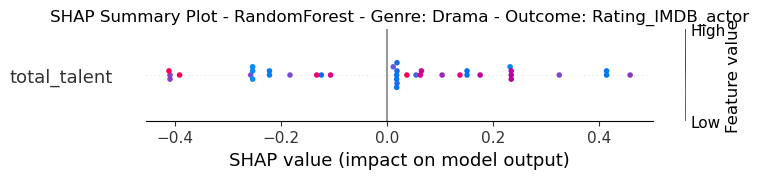


Linear Regression for revenue in Genre Western:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


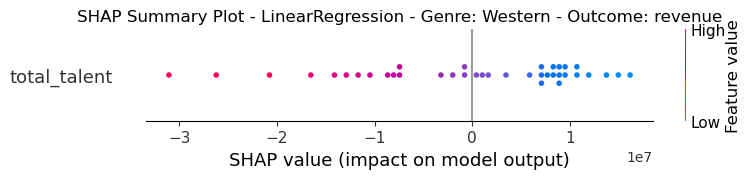


Random Forest Regression for revenue in Genre Western:
Mean Squared Error (Random Forest Regression): 9.4751393993189e+16


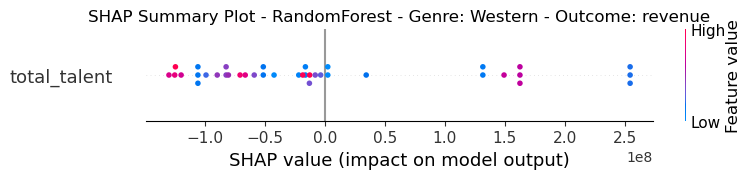


Linear Regression for Rating_IMDB_actor in Genre Western:
Mean Squared Error (Linear Regression): 0.21556149703024796


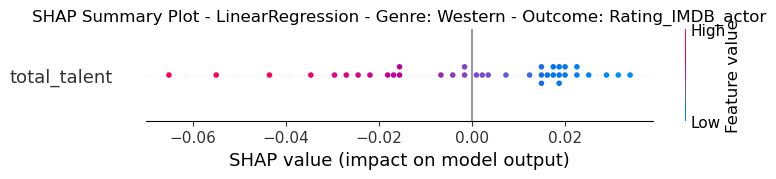


Random Forest Regression for Rating_IMDB_actor in Genre Western:
Mean Squared Error (Random Forest Regression): 0.2613049375921584


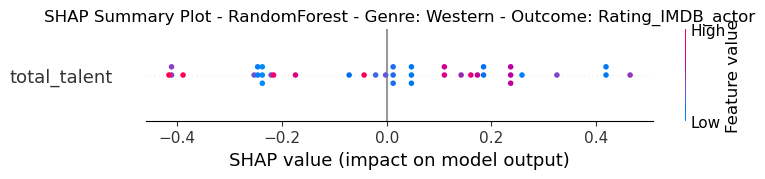


Linear Regression for revenue in Genre Action:
Mean Squared Error (Linear Regression): 1.0308395220677568e+17


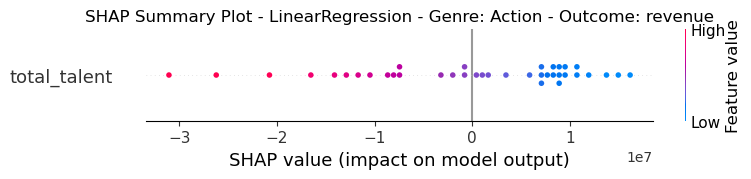


Random Forest Regression for revenue in Genre Action:
Mean Squared Error (Random Forest Regression): 9.262267185085445e+16


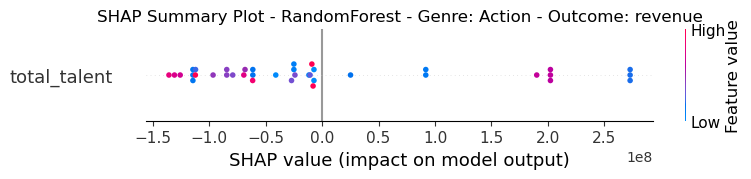


Linear Regression for Rating_IMDB_actor in Genre Action:
Mean Squared Error (Linear Regression): 0.21556149703024796


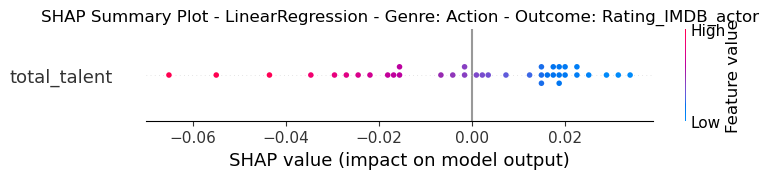


Random Forest Regression for Rating_IMDB_actor in Genre Action:
Mean Squared Error (Random Forest Regression): 0.25289171290620693


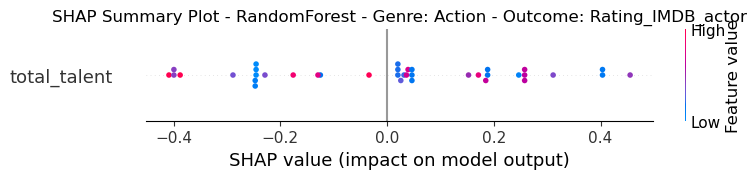

In [17]:
apply_models_for_outcomes(data, new_data, talent_data, unique_genres, talent_f)


Linear Regression for revenue in Genre History:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


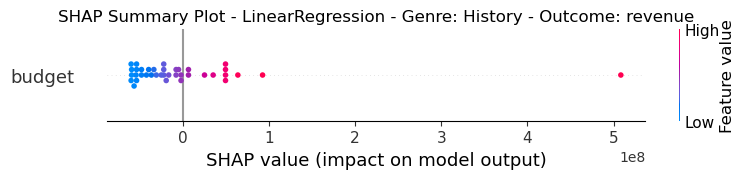


Random Forest Regression for revenue in Genre History:
Mean Squared Error (Random Forest Regression): 8.533764595005258e+16


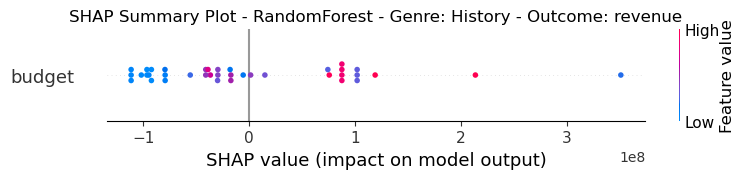


Linear Regression for Rating_IMDB_actor in Genre History:
Mean Squared Error (Linear Regression): 0.21956116817003715


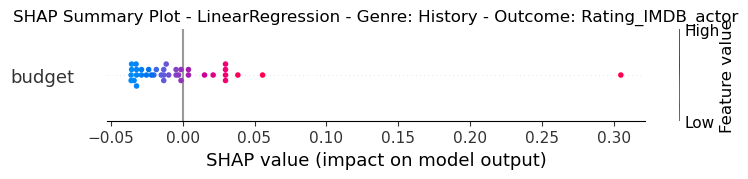


Random Forest Regression for Rating_IMDB_actor in Genre History:
Mean Squared Error (Random Forest Regression): 0.33985903771378956


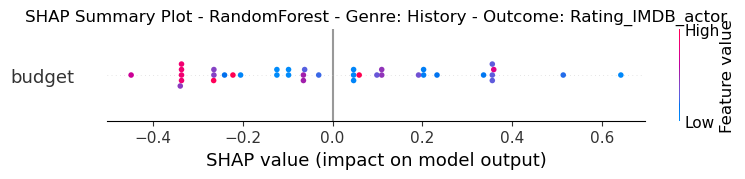


Linear Regression for revenue in Genre Crime:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


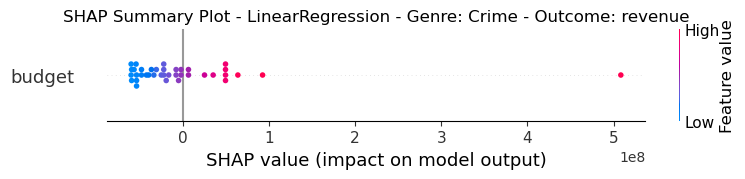


Random Forest Regression for revenue in Genre Crime:
Mean Squared Error (Random Forest Regression): 8.4199045925531e+16


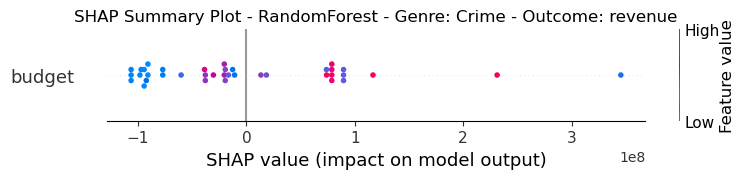


Linear Regression for Rating_IMDB_actor in Genre Crime:
Mean Squared Error (Linear Regression): 0.21956116817003715


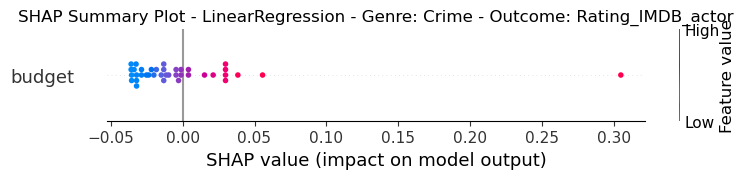


Random Forest Regression for Rating_IMDB_actor in Genre Crime:
Mean Squared Error (Random Forest Regression): 0.35028780858577396


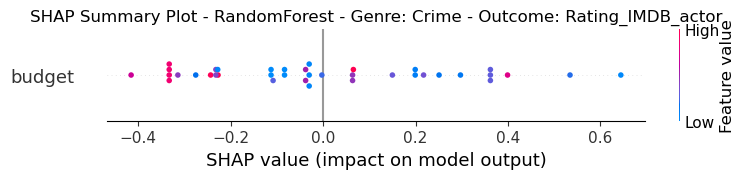


Linear Regression for revenue in Genre Adventure:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


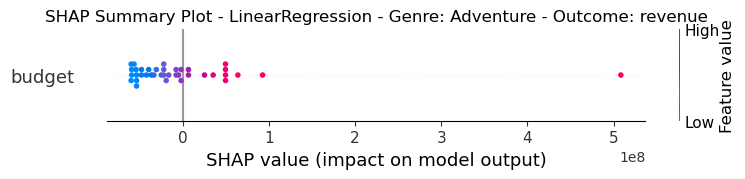


Random Forest Regression for revenue in Genre Adventure:
Mean Squared Error (Random Forest Regression): 8.469877992991491e+16


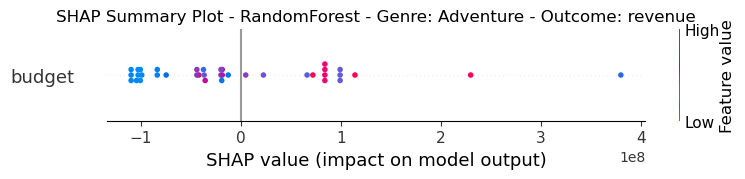


Linear Regression for Rating_IMDB_actor in Genre Adventure:
Mean Squared Error (Linear Regression): 0.21956116817003715


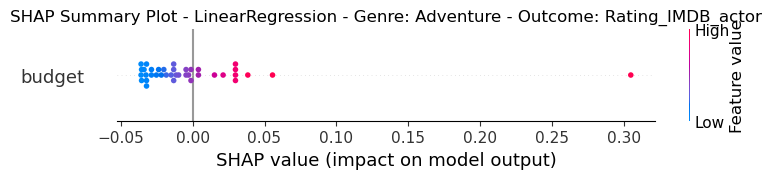


Random Forest Regression for Rating_IMDB_actor in Genre Adventure:
Mean Squared Error (Random Forest Regression): 0.34921106544372765


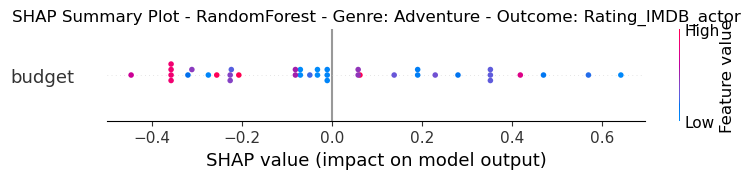


Linear Regression for revenue in Genre Horror:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


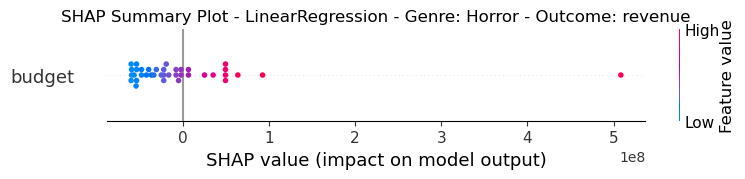


Random Forest Regression for revenue in Genre Horror:
Mean Squared Error (Random Forest Regression): 8.418864160651678e+16


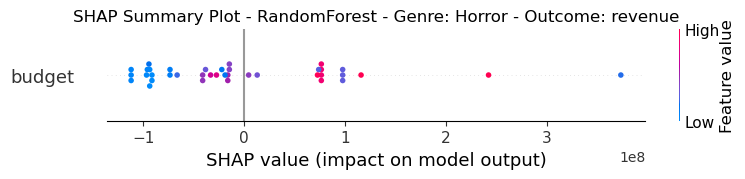


Linear Regression for Rating_IMDB_actor in Genre Horror:
Mean Squared Error (Linear Regression): 0.21956116817003715


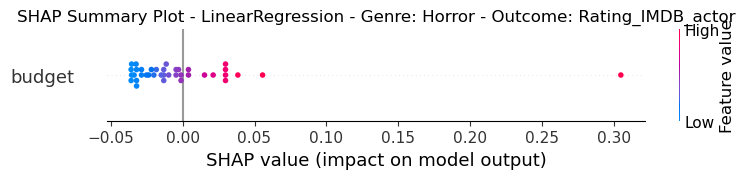


Random Forest Regression for Rating_IMDB_actor in Genre Horror:
Mean Squared Error (Random Forest Regression): 0.3391120499047176


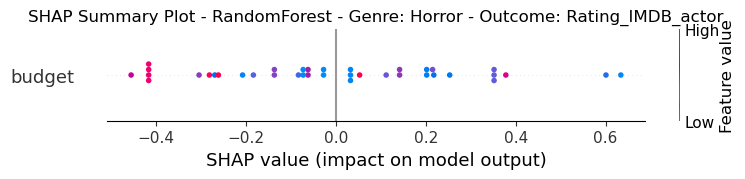


Linear Regression for revenue in Genre Music:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


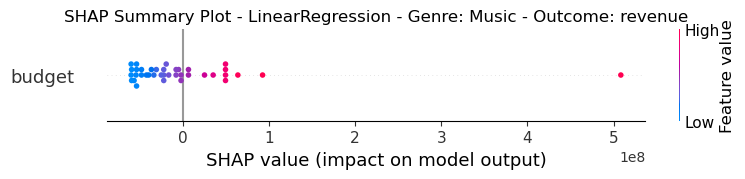


Random Forest Regression for revenue in Genre Music:
Mean Squared Error (Random Forest Regression): 8.757322225762086e+16


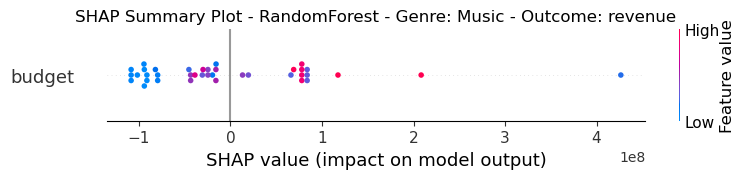


Linear Regression for Rating_IMDB_actor in Genre Music:
Mean Squared Error (Linear Regression): 0.21956116817003715


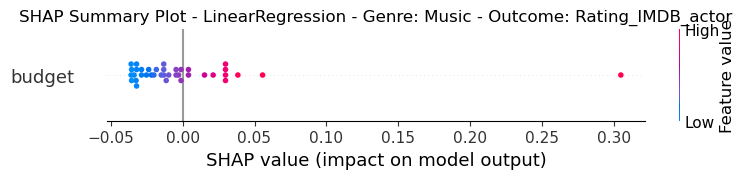


Random Forest Regression for Rating_IMDB_actor in Genre Music:
Mean Squared Error (Random Forest Regression): 0.3329993903722983


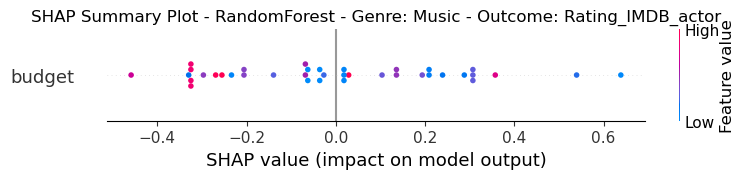


Linear Regression for revenue in Genre Science Fiction:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


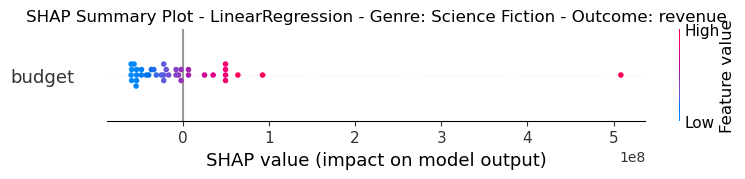


Random Forest Regression for revenue in Genre Science Fiction:
Mean Squared Error (Random Forest Regression): 8.601076752914349e+16


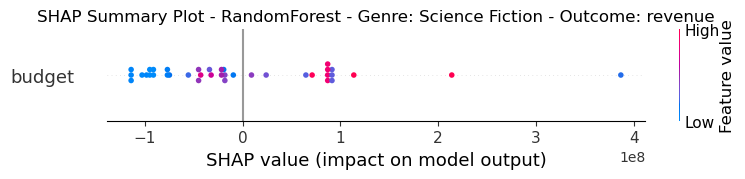


Linear Regression for Rating_IMDB_actor in Genre Science Fiction:
Mean Squared Error (Linear Regression): 0.21956116817003715


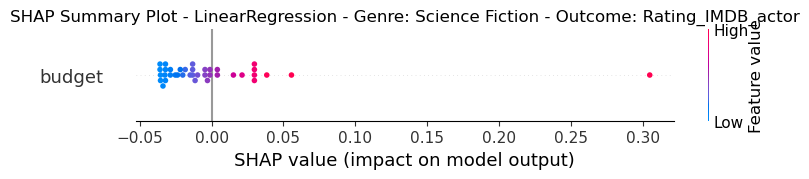


Random Forest Regression for Rating_IMDB_actor in Genre Science Fiction:
Mean Squared Error (Random Forest Regression): 0.3349115242814741


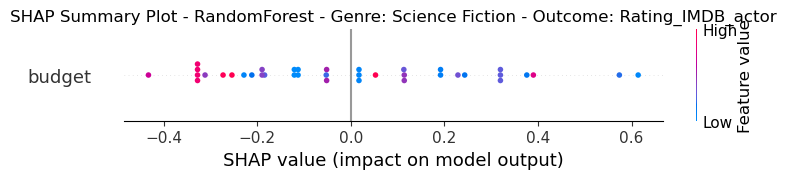


Linear Regression for revenue in Genre Comedy:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


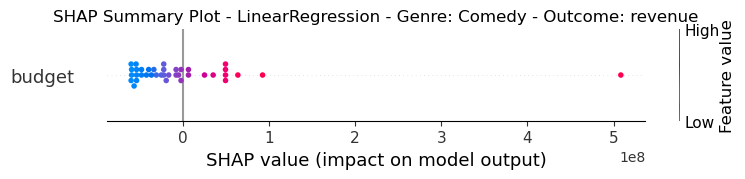


Random Forest Regression for revenue in Genre Comedy:
Mean Squared Error (Random Forest Regression): 8.579392501406013e+16


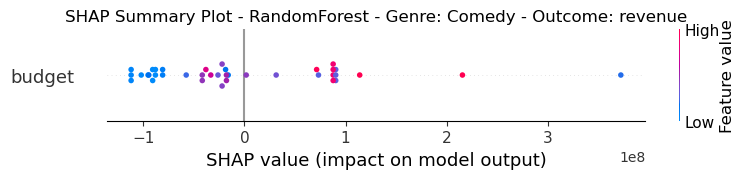


Linear Regression for Rating_IMDB_actor in Genre Comedy:
Mean Squared Error (Linear Regression): 0.21956116817003715


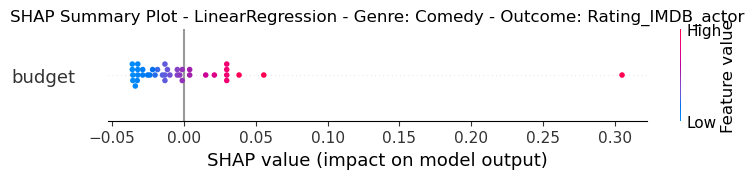


Random Forest Regression for Rating_IMDB_actor in Genre Comedy:
Mean Squared Error (Random Forest Regression): 0.33582084527941874


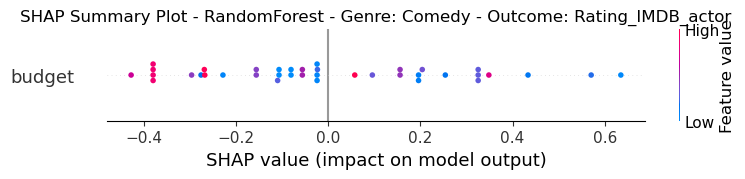


Linear Regression for revenue in Genre Mystery:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


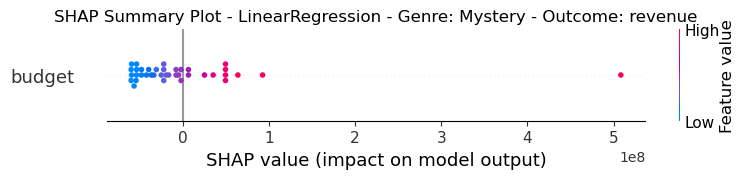


Random Forest Regression for revenue in Genre Mystery:
Mean Squared Error (Random Forest Regression): 8.266888433997179e+16


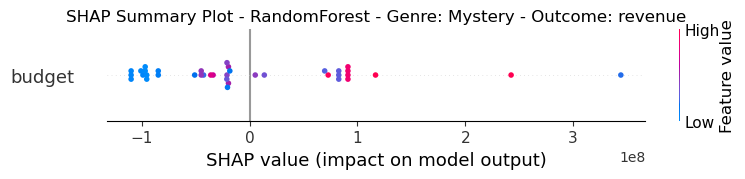


Linear Regression for Rating_IMDB_actor in Genre Mystery:
Mean Squared Error (Linear Regression): 0.21956116817003715


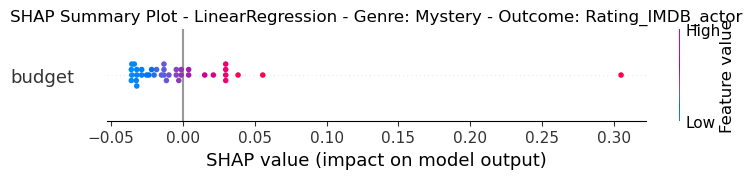


Random Forest Regression for Rating_IMDB_actor in Genre Mystery:
Mean Squared Error (Random Forest Regression): 0.3296660950021948


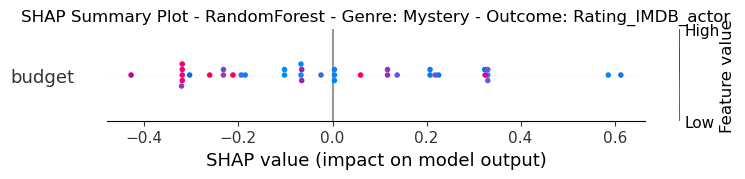


Linear Regression for revenue in Genre Family:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


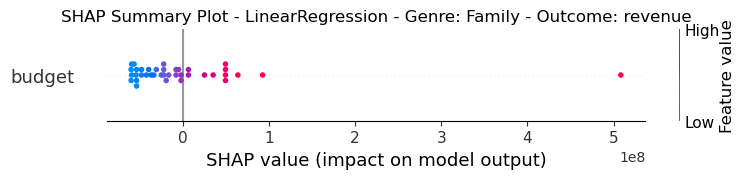


Random Forest Regression for revenue in Genre Family:
Mean Squared Error (Random Forest Regression): 8.666398163043899e+16


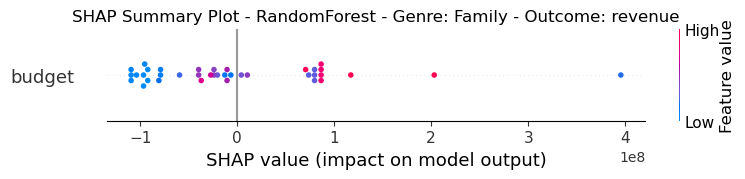


Linear Regression for Rating_IMDB_actor in Genre Family:
Mean Squared Error (Linear Regression): 0.21956116817003715


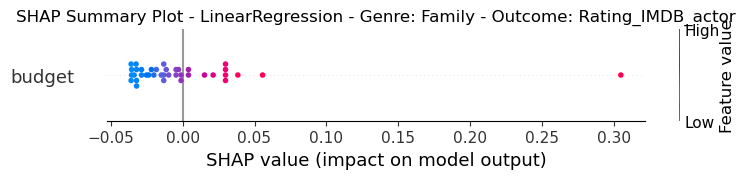


Random Forest Regression for Rating_IMDB_actor in Genre Family:
Mean Squared Error (Random Forest Regression): 0.3395926009966729


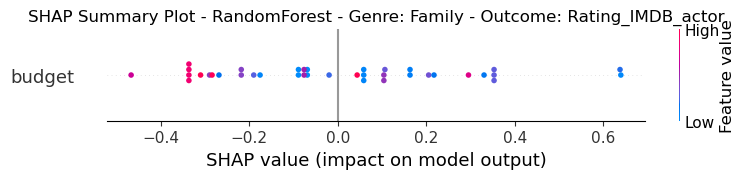


Linear Regression for revenue in Genre Fantasy:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


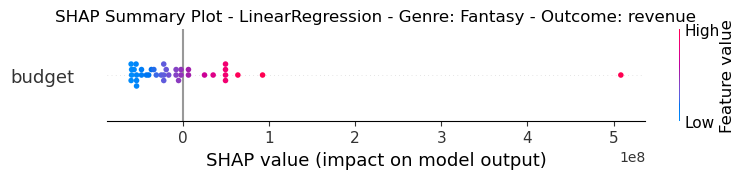


Random Forest Regression for revenue in Genre Fantasy:
Mean Squared Error (Random Forest Regression): 8.464537143086981e+16


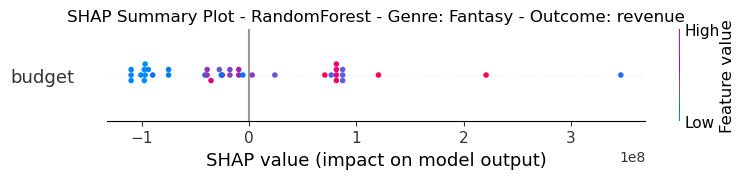


Linear Regression for Rating_IMDB_actor in Genre Fantasy:
Mean Squared Error (Linear Regression): 0.21956116817003715


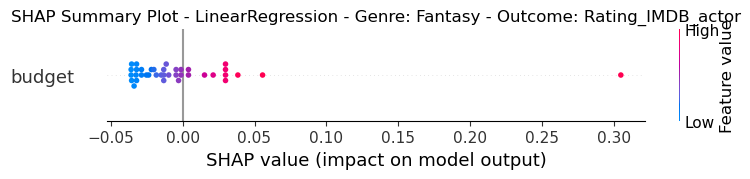


Random Forest Regression for Rating_IMDB_actor in Genre Fantasy:
Mean Squared Error (Random Forest Regression): 0.3333121006197488


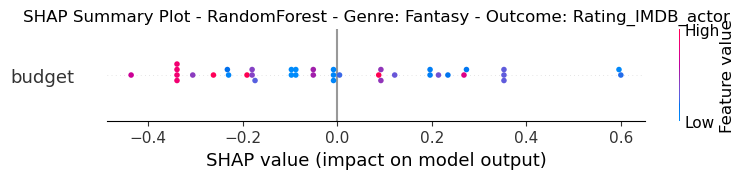


Linear Regression for revenue in Genre War:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


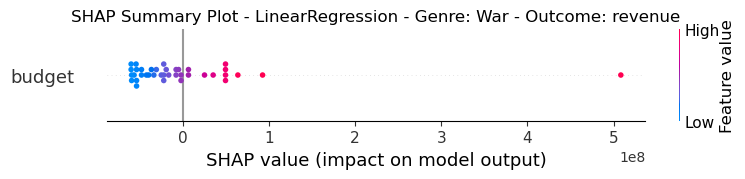


Random Forest Regression for revenue in Genre War:
Mean Squared Error (Random Forest Regression): 8.57742578635708e+16


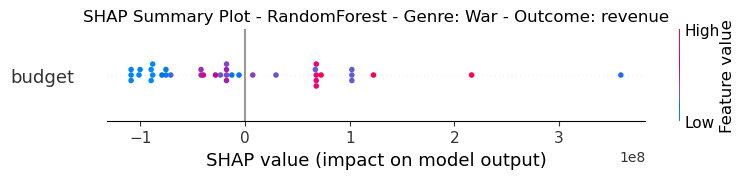


Linear Regression for Rating_IMDB_actor in Genre War:
Mean Squared Error (Linear Regression): 0.21956116817003715


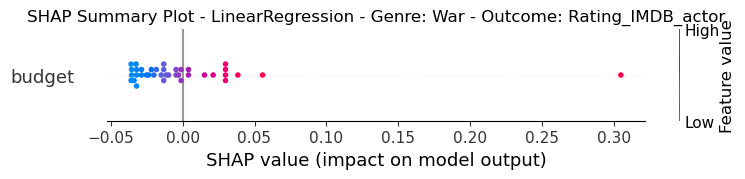


Random Forest Regression for Rating_IMDB_actor in Genre War:
Mean Squared Error (Random Forest Regression): 0.34335792584596786


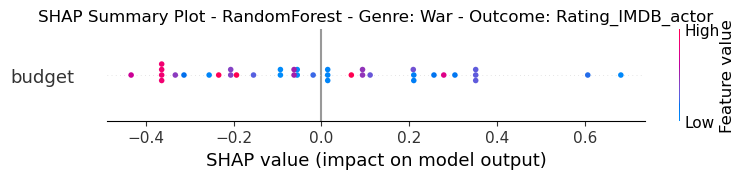


Linear Regression for revenue in Genre Romance:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


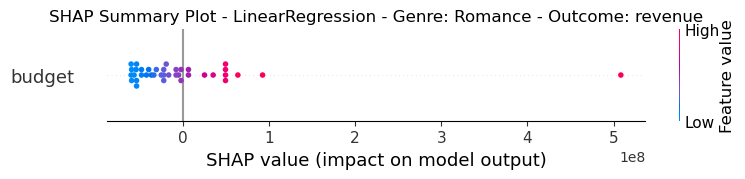


Random Forest Regression for revenue in Genre Romance:
Mean Squared Error (Random Forest Regression): 8.368717153089211e+16


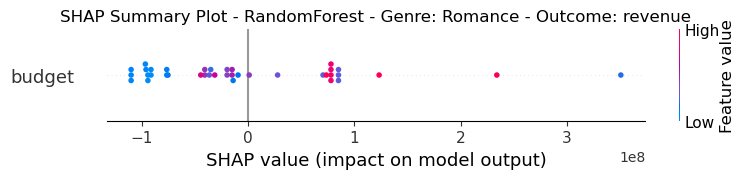


Linear Regression for Rating_IMDB_actor in Genre Romance:
Mean Squared Error (Linear Regression): 0.21956116817003715


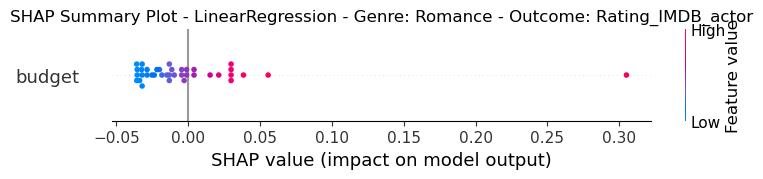


Random Forest Regression for Rating_IMDB_actor in Genre Romance:
Mean Squared Error (Random Forest Regression): 0.3466001993597472


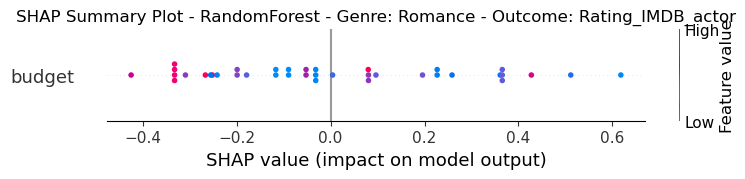


Linear Regression for revenue in Genre Thriller:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


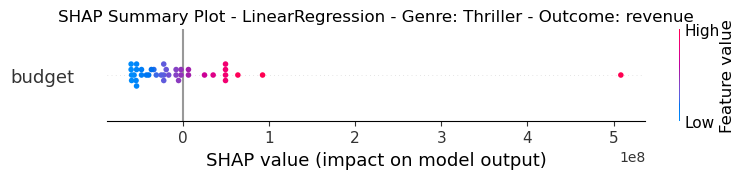


Random Forest Regression for revenue in Genre Thriller:
Mean Squared Error (Random Forest Regression): 8.509844977714907e+16


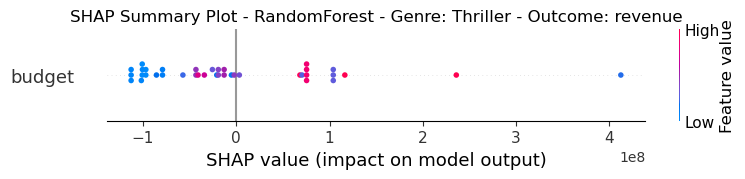


Linear Regression for Rating_IMDB_actor in Genre Thriller:
Mean Squared Error (Linear Regression): 0.21956116817003715


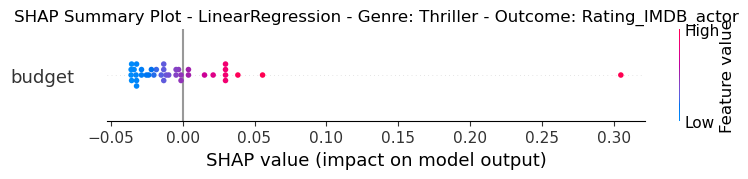


Random Forest Regression for Rating_IMDB_actor in Genre Thriller:
Mean Squared Error (Random Forest Regression): 0.3345774936441083


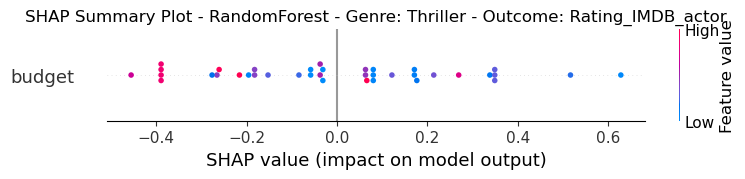


Linear Regression for revenue in Genre Drama:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


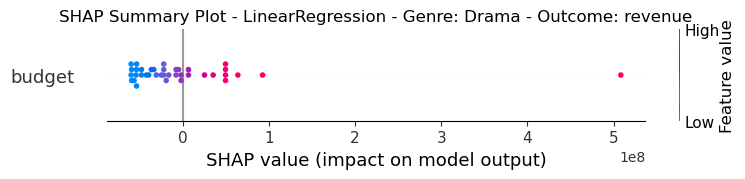


Random Forest Regression for revenue in Genre Drama:
Mean Squared Error (Random Forest Regression): 8.37359336187605e+16


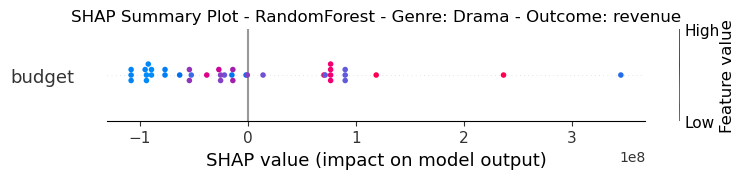


Linear Regression for Rating_IMDB_actor in Genre Drama:
Mean Squared Error (Linear Regression): 0.21956116817003715


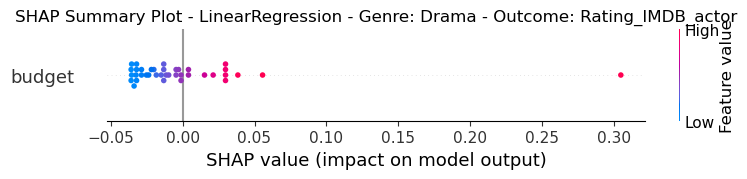


Random Forest Regression for Rating_IMDB_actor in Genre Drama:
Mean Squared Error (Random Forest Regression): 0.34656928594968683


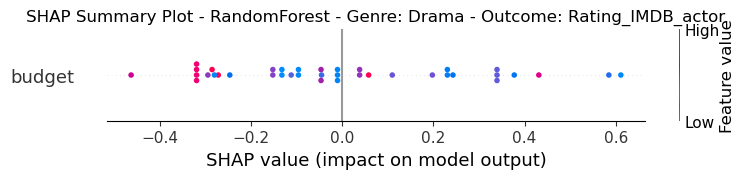


Linear Regression for revenue in Genre Western:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


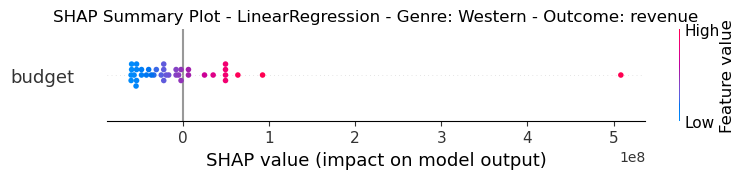


Random Forest Regression for revenue in Genre Western:
Mean Squared Error (Random Forest Regression): 8.458173457530219e+16


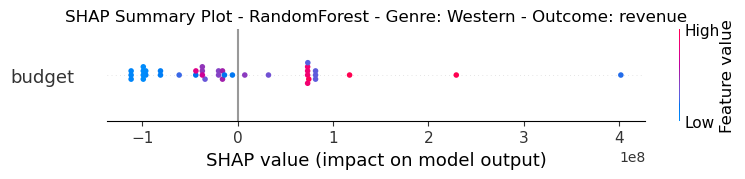


Linear Regression for Rating_IMDB_actor in Genre Western:
Mean Squared Error (Linear Regression): 0.21956116817003715


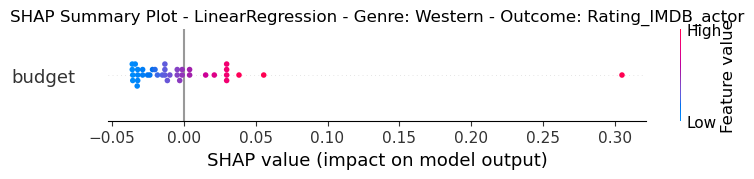


Random Forest Regression for Rating_IMDB_actor in Genre Western:
Mean Squared Error (Random Forest Regression): 0.3378371585138753


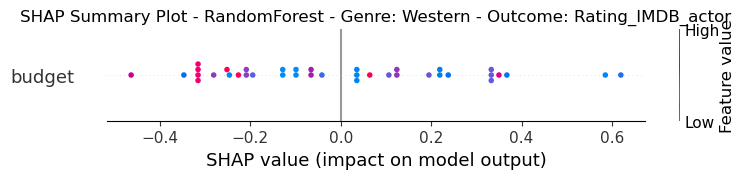


Linear Regression for revenue in Genre Action:
Mean Squared Error (Linear Regression): 5.836456636315628e+16


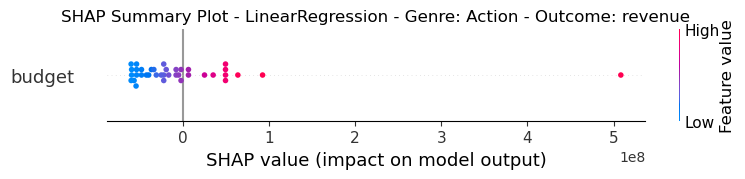


Random Forest Regression for revenue in Genre Action:
Mean Squared Error (Random Forest Regression): 8.54102245076963e+16


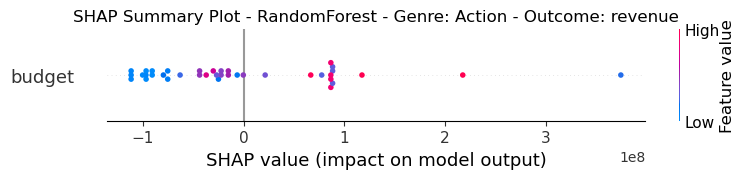


Linear Regression for Rating_IMDB_actor in Genre Action:
Mean Squared Error (Linear Regression): 0.21956116817003715


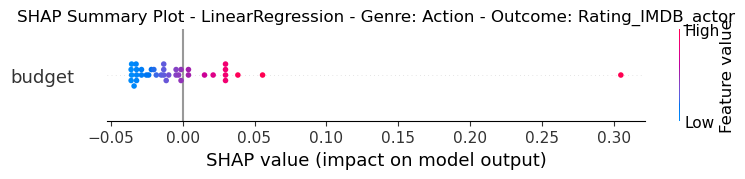


Random Forest Regression for Rating_IMDB_actor in Genre Action:
Mean Squared Error (Random Forest Regression): 0.33656684553468386


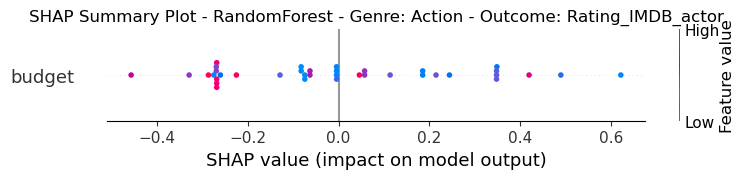

In [18]:
apply_models_for_outcomes(data, new_data, finance_data, unique_genres, finance_f)